In [1]:
#獲取Forbes前三百中英名單及財富值

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url='http://www.forbeschina.com/review/list/002436.shtml'
re = requests.get(url)
re.encoding = 'utf-8'
soup = BeautifulSoup(re.text,'html.parser')

In [4]:
right_table=soup.find('table', id='show_list')
right_table

<table id="show_list">
<thead>
<td class="p_result_key_value" style="width:154px ">排名</td><td class="p_result_key_value" name="col" style="width:154px ">姓名（中文）</td><td class="p_result_key_value" name="col" style="width:154px ">姓名（英文）</td><td class="p_result_key_value" name="col" style="width:154px ">财富值（亿美元）</td><td class="p_result_key_value" name="col" style="width:154px ">财富来源</td> </thead>
<tbody>
<tr class="div_result_value"><td class="p_result_key_value" style="width:154px">1</td><td class="p_result_key_value" style="width:154px">杰夫·贝索斯</td><td class="p_result_key_value" style="width:154px">Jeff Bezos</td><td class="p_result_key_value" style="width:154px">1120</td><td class="p_result_key_value" style="width:154px">亚马逊</td></tr><tr class="div_result_value"><td class="p_result_key_value" style="width:154px">2</td><td class="p_result_key_value" style="width:154px">比尔·盖茨</td><td class="p_result_key_value" style="width:154px">Bill Gates</td><td class="p_result_key_value" style="width:1

In [5]:
thead= [header.text for header in right_table.find_all('td')]
print(thead)

['排名', '姓名（中文）', '姓名（英文）', '财富值（亿美元）', '财富来源', '1', '杰夫·贝索斯', 'Jeff Bezos', '1120', '亚马逊', '2', '比尔·盖茨', 'Bill Gates', '900', '微软', '3', '沃伦·巴菲特', 'Warren Buffett', '840', '伯克希尔哈撒韦', '4', '伯纳德·阿诺特及家族', 'Bernard Arnault & family', '720', '路威酩轩', '5', '马克·扎克伯格', 'Mark Zuckerberg', '710', 'Facebook', '6', '阿曼西奥·奥特加', 'Amancio Ortega', '700', 'Zara', '7', '卡洛斯·斯利姆·埃卢及家族', 'Carlos Slim Helu & family', '671', '电信', '8', '查尔斯·科赫', 'Charles Koch', '600', '科氏工业', '8', '大卫·科赫', 'David Koch', '600', '科氏工业', '10', '拉里·埃里森', 'Larry Ellison', '585', '软件', '11', '迈克尔·布隆伯格', 'Michael Bloomberg', '500', '彭博', '12', '拉里·佩奇', 'Larry Page', '488', '谷歌', '13', '谢尔盖·布林', 'Sergey Brin', '475', '谷歌', '14', '吉姆·沃尔顿', 'Jim Walton', '464', '沃尔玛', '15', 'S.罗伯森·沃尔顿', 'S. Robson Walton', '462', '沃尔玛', '16', '艾丽斯·沃尔顿', 'Alice Walton', '460', '沃尔玛', '17', '马化腾', 'Ma Huateng', '453', '网络媒体', '18', '弗朗索瓦丝·贝当古·迈耶斯及家族', 'Francoise Bettencourt Meyers & family', '422', '欧莱雅', '19', '穆克什·安巴尼', 'Mukesh Ambani', '401', '石化，石油

In [6]:
headers=(thead[0:5])
print(headers)

['排名', '姓名（中文）', '姓名（英文）', '财富值（亿美元）', '财富来源']


In [7]:
rows = []
for row in right_table.find_all('tr'):
    rows.append([val.text for val in row.find_all('td')])

In [8]:
for n,r in enumerate(rows):
    print(n,r)
    if n > 300: break

0 ['1', '杰夫·贝索斯', 'Jeff Bezos', '1120', '亚马逊']
1 ['2', '比尔·盖茨', 'Bill Gates', '900', '微软']
2 ['3', '沃伦·巴菲特', 'Warren Buffett', '840', '伯克希尔哈撒韦']
3 ['4', '伯纳德·阿诺特及家族', 'Bernard Arnault & family', '720', '路威酩轩']
4 ['5', '马克·扎克伯格', 'Mark Zuckerberg', '710', 'Facebook']
5 ['6', '阿曼西奥·奥特加', 'Amancio Ortega', '700', 'Zara']
6 ['7', '卡洛斯·斯利姆·埃卢及家族', 'Carlos Slim Helu & family', '671', '电信']
7 ['8', '查尔斯·科赫', 'Charles Koch', '600', '科氏工业']
8 ['8', '大卫·科赫', 'David Koch', '600', '科氏工业']
9 ['10', '拉里·埃里森', 'Larry Ellison', '585', '软件']
10 ['11', '迈克尔·布隆伯格', 'Michael Bloomberg', '500', '彭博']
11 ['12', '拉里·佩奇', 'Larry Page', '488', '谷歌']
12 ['13', '谢尔盖·布林', 'Sergey Brin', '475', '谷歌']
13 ['14', '吉姆·沃尔顿', 'Jim Walton', '464', '沃尔玛']
14 ['15', 'S.罗伯森·沃尔顿', 'S. Robson Walton', '462', '沃尔玛']
15 ['16', '艾丽斯·沃尔顿', 'Alice Walton', '460', '沃尔玛']
16 ['17', '马化腾', 'Ma Huateng', '453', '网络媒体']
17 ['18', '弗朗索瓦丝·贝当古·迈耶斯及家族', 'Francoise Bettencourt Meyers & family', '422', '欧莱雅']
18 ['19', '穆克什·安巴尼', 'Mukesh Amb

In [9]:
dfForbes = pd.DataFrame(rows, columns=headers)
dfForbes

,排名,姓名（中文）,姓名（英文）,财富值（亿美元）,财富来源
0,1,杰夫·贝索斯,Jeff Bezos,1120,亚马逊
1,2,比尔·盖茨,Bill Gates,900,微软
2,3,沃伦·巴菲特,Warren Buffett,840,伯克希尔哈撒韦
3,4,伯纳德·阿诺特及家族,Bernard Arnault & family,720,路威酩轩
4,5,马克·扎克伯格,Mark Zuckerberg,710,Facebook
5,6,阿曼西奥·奥特加,Amancio Ortega,700,Zara
6,7,卡洛斯·斯利姆·埃卢及家族,Carlos Slim Helu & family,671,电信
7,8,查尔斯·科赫,Charles Koch,600,科氏工业
8,8,大卫·科赫,David Koch,600,科氏工业
9,10,拉里·埃里森,Larry Ellison,585,软件


In [10]:
dfForbes.to_csv('pd_namelists.csv')

In [11]:
#獲取生日並生成對應星座

In [12]:
import requests 
from bs4 import BeautifulSoup
import bs4 as bs
import csv
import pandas as pd

In [13]:
forbes = pd.read_csv('pd_namelists.csv',usecols=[3])
forbes['姓名（英文）'].head(300)

0                                  Jeff Bezos
1                                  Bill Gates
2                              Warren Buffett
3                    Bernard Arnault & family
4                             Mark Zuckerberg
5                              Amancio Ortega
6                   Carlos Slim Helu & family
7                                Charles Koch
8                                  David Koch
9                               Larry Ellison
10                          Michael Bloomberg
11                                 Larry Page
12                                Sergey Brin
13                                 Jim Walton
14                           S. Robson Walton
15                               Alice Walton
16                                 Ma Huateng
17      Francoise Bettencourt Meyers & family
18                              Mukesh Ambani
19                                    Jack Ma
20                            Sheldon Adelson
21                              St

In [14]:
forbeslist = forbes['姓名（英文）'].str.replace(' & family','')
print(forbeslist)

0                             Jeff Bezos
1                             Bill Gates
2                         Warren Buffett
3                        Bernard Arnault
4                        Mark Zuckerberg
5                         Amancio Ortega
6                       Carlos Slim Helu
7                           Charles Koch
8                             David Koch
9                          Larry Ellison
10                     Michael Bloomberg
11                            Larry Page
12                           Sergey Brin
13                            Jim Walton
14                      S. Robson Walton
15                          Alice Walton
16                            Ma Huateng
17          Francoise Bettencourt Meyers
18                         Mukesh Ambani
19                               Jack Ma
20                       Sheldon Adelson
21                         Steve Ballmer
22                           Li Ka-shing
23                            Hui Ka Yan
24              

In [15]:
births = []  
names = [str(i) for i in forbeslist.head(300)]
for name in names:
    source = requests.get('https://en.wikipedia.org/wiki/' + name)
    page_html = bs.BeautifulSoup(source.content, 'html.parser')
    bdayscontainer = page_html.find_all('span', attrs = {'bday'}) 
    if len(bdayscontainer)!=0:
        for a in bdayscontainer:
            bdayscontainers = a.get_text()
            births.append(bdayscontainers)
    else:
        bdayscontainers = "null"
        births.append(bdayscontainers)    
print(births)

['1964-01-12', '1955-10-28', '1930-08-30', '1949-03-05', '1984-05-14', '1936-03-28', '1940-01-28', '1935-11-01', '1940-05-03', '1944-08-17', '1942-02-14', '1973-03-26', '1973-08-21', '1948-06-07', '1944-10-28', '1949-10-07', '1971-10-29', '1953-07-10', '1957-04-19', '1964-09-10', '1933-08-04', '1956-03-24', '1928-06-13', '1958-10-09', '1929-03-07', '1954-10-24', 'null', '1938-02-24', '1939-08-26', '1936-08-21', '1964-10-19', '1962-04-28', 'null', '1939-10-10', 'null', 'null', '1964-09-21', '1944-05-20', '1965-02-23', '1957-08-11', '1925-04-04', '1966-05-09', 'null', '1953-01-21', '1935-05-22', '1939-09-24', 'null', 'null', '1957-06-14', 'null', 'null', '1938-04-25', '1924-10-25', '1971-06-28', 'null', '1949-02-07', '1956-05-07', '1963-11-06', '1945-07-24', '1965-09-26', '1942-01-09', '1950-06-15', 'null', '1955-08-11', '1944-05-02', 'null', '1949-08-08', '1945-06-10', '1971-10-01', 'null', '1954-02-09', '1941-07-08', '1936-02-16', 'null', '1939-10-02', '1951-07-21', 'null', '1950-09-01

In [16]:
from pandas.core.frame import DataFrame 
birthdata=DataFrame(births)
print(birthdata)

              0
0    1964-01-12
1    1955-10-28
2    1930-08-30
3    1949-03-05
4    1984-05-14
5    1936-03-28
6    1940-01-28
7    1935-11-01
8    1940-05-03
9    1944-08-17
10   1942-02-14
11   1973-03-26
12   1973-08-21
13   1948-06-07
14   1944-10-28
15   1949-10-07
16   1971-10-29
17   1953-07-10
18   1957-04-19
19   1964-09-10
20   1933-08-04
21   1956-03-24
22   1928-06-13
23   1958-10-09
24   1929-03-07
25   1954-10-24
26         null
27   1938-02-24
28   1939-08-26
29   1936-08-21
..          ...
271        null
272  1931-11-15
273        null
274  1972-08-04
275  1939-09-17
276        null
277  1943-09-06
278        null
279  1936-07-12
280        null
281        null
282  1944-10-19
283  1941-06-05
284  1939-10-14
285        null
286  1944-02-15
287  1930-01-24
288  1937-09-08
289        null
290  1951-03-29
291        null
292  1929-09-25
293        null
294        null
295        null
296        null
297  1963-05-02
298        null
299  1930-10-22
300        null

[301 ro

In [17]:
birthdata.columns = ['生日']
forbesdata = forbeslist.head(301)
borndata = pd.concat((forbesdata, birthdata), axis = 1)
borndata.set_index('姓名（英文）')
birthdaydata = borndata['生日'].str.split('-', expand = True)
birthdaydata

,0,1,2
0,1964,01,12
1,1955,10,28
2,1930,08,30
3,1949,03,05
4,1984,05,14
5,1936,03,28
6,1940,01,28
7,1935,11,01
8,1940,05,03
9,1944,08,17


In [18]:
birthdayfinal = pd.merge (borndata, birthdaydata, left_index=True, right_index=True, how='outer')
birthdayfinal.columns = ['name', 'birthday', 'year', 'month', 'day']
birthdayfinal.info()
birthdayfinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
name        301 non-null object
birthday    301 non-null object
year        301 non-null object
month       193 non-null object
day         193 non-null object
dtypes: object(5)
memory usage: 11.8+ KB


,name,birthday,year,month,day
0,Jeff Bezos,1964-01-12,1964,01,12
1,Bill Gates,1955-10-28,1955,10,28
2,Warren Buffett,1930-08-30,1930,08,30
3,Bernard Arnault,1949-03-05,1949,03,05
4,Mark Zuckerberg,1984-05-14,1984,05,14
5,Amancio Ortega,1936-03-28,1936,03,28
6,Carlos Slim Helu,1940-01-28,1940,01,28
7,Charles Koch,1935-11-01,1935,11,01
8,David Koch,1940-05-03,1940,05,03
9,Larry Ellison,1944-08-17,1944,08,17


In [19]:
stardata = birthdayfinal.dropna(subset=["name", "year", "month", "day"])
mlist = stardata['month'].astype(int)
print(type(mlist))
print(len(mlist))
dlist = stardata['day'].astype(int)
print(type(dlist))
print(len(dlist))

<class 'pandas.core.series.Series'>
193
<class 'pandas.core.series.Series'>
193


In [20]:
xzlist = []  
for month, date in zip(dlist, mlist):
    def get_constellation(month,date):
        dates = (20,19,21,20,21,22,23,23,23,24,23,22)
        constellations = ("摩羯","水瓶","双鱼","白羊","金牛","双子","巨蟹","狮子","处女","天秤","天蝎","射手","摩羯")
        if (date < dates[month-1]):
            return constellations[month-1]
        else:
            return constellations[month]
    xz = get_constellation(date,month)
    xzlist.append(xz)
print(xzlist) 

['摩羯', '天蝎', '处女', '双鱼', '金牛', '白羊', '水瓶', '天蝎', '金牛', '狮子', '水瓶', '白羊', '狮子', '双子', '天蝎', '天秤', '天蝎', '巨蟹', '白羊', '处女', '狮子', '白羊', '双子', '天秤', '双鱼', '天蝎', '双鱼', '处女', '狮子', '天秤', '金牛', '天秤', '处女', '金牛', '双鱼', '狮子', '白羊', '金牛', '水瓶', '双子', '天秤', '双子', '金牛', '天蝎', '巨蟹', '水瓶', '金牛', '天蝎', '狮子', '天秤', '摩羯', '双子', '狮子', '金牛', '狮子', '双子', '天秤', '水瓶', '巨蟹', '水瓶', '天秤', '巨蟹', '处女', '天秤', '金牛', '天蝎', '射手', '摩羯', '巨蟹', '处女', '金牛', '双鱼', '双子', '巨蟹', '金牛', '双鱼', '白羊', '天秤', '处女', '巨蟹', '白羊', '白羊', '射手', '双子', '双子', '双鱼', '金牛', '双鱼', '金牛', '摩羯', '白羊', '白羊', '双鱼', '天秤', '水瓶', '水瓶', '射手', '白羊', '处女', '处女', '水瓶', '天蝎', '处女', '双子', '水瓶', '双子', '射手', '水瓶', '天秤', '处女', '天蝎', '狮子', '双鱼', '双子', '金牛', '双鱼', '金牛', '天蝎', '摩羯', '巨蟹', '巨蟹', '金牛', '天蝎', '双鱼', '天秤', '双鱼', '双鱼', '摩羯', '巨蟹', '处女', '双鱼', '双鱼', '天秤', '天秤', '摩羯', '狮子', '金牛', '双鱼', '处女', '天秤', '双鱼', '狮子', '巨蟹', '狮子', '狮子', '双子', '天秤', '白羊', '狮子', '巨蟹', '双子', '射手', '水瓶', '巨蟹', '白羊', '巨蟹', '天秤', '狮子', '金牛', '狮子', '水瓶', '双子', '水瓶', '白羊', '天秤', '白羊', '天蝎

In [21]:
xzlistdata=DataFrame(xzlist)
xzlistdata.columns = ['星座']
print(len(xzlistdata))

193


In [22]:
stardata2 = stardata.reset_index(drop=True)
wholedata = pd.merge (stardata2, xzlistdata, left_index=True, right_index=True, how='outer')
wholedata

,name,birthday,year,month,day,星座
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯
1,Bill Gates,1955-10-28,1955,10,28,天蝎
2,Warren Buffett,1930-08-30,1930,08,30,处女
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛
5,Amancio Ortega,1936-03-28,1936,03,28,白羊
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶
7,Charles Koch,1935-11-01,1935,11,01,天蝎
8,David Koch,1940-05-03,1940,05,03,金牛
9,Larry Ellison,1944-08-17,1944,08,17,狮子


In [23]:
import pandas as pd
value = pd.read_csv('pd_namelists.csv',usecols=[4])
value.head(300)
forbes_value = pd.merge(wholedata, value, left_index=True, right_index=True, how='outer')
finaldata_clear = forbes_value.dropna(subset=['name', 'birthday', 'year', 'month','day','财富值（亿美元）'])
print(len(finaldata_clear))
finaldata_clear

193


,name,birthday,year,month,day,星座,财富值（亿美元）
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯,1120
1,Bill Gates,1955-10-28,1955,10,28,天蝎,900
2,Warren Buffett,1930-08-30,1930,08,30,处女,840
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼,720
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛,710
5,Amancio Ortega,1936-03-28,1936,03,28,白羊,700
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶,671
7,Charles Koch,1935-11-01,1935,11,01,天蝎,600
8,David Koch,1940-05-03,1940,05,03,金牛,600
9,Larry Ellison,1944-08-17,1944,08,17,狮子,585


In [24]:
finaldata_clear.to_csv('pd_finaldataclear.csv')

In [25]:
#分析部分

In [26]:
import matplotlib.pyplot as plt
g1_1 = wholedata
g1_1=g1_1.drop(69) #去除無效數據

In [27]:
print(len(g1_1))
g1_1['星座'].value_counts()

192


天秤    25
金牛    19
双鱼    19
水瓶    18
狮子    17
处女    16
白羊    16
双子    16
巨蟹    15
天蝎    14
摩羯    10
射手     7
Name: 星座, dtype: int64

Text(0.5,1,'福布斯榜各星座比重')

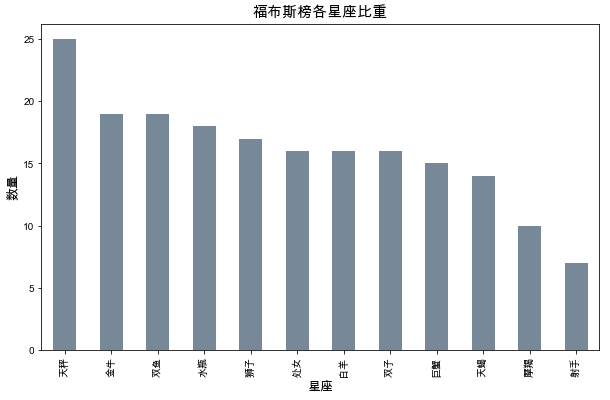

In [51]:
#plt.rcParams['font.sans-serif']=['SimHei'] #在windows環境下解決matplotlib中文亂碼
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #在mac環境下解決matplotlib中文亂碼
fig=plt.figure(figsize=(10,6)) 
g1_1['星座'].value_counts().plot(kind='bar',color='#778899')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('福布斯榜各星座比重',size=15)

In [52]:
g1_a=g1_1['星座'].head(48) #取12的整數倍進行分層
print(len(g1_a))
g1_a.value_counts()

48


金牛    7
天蝎    7
狮子    5
天秤    5
白羊    5
处女    4
双鱼    4
双子    4
水瓶    4
巨蟹    2
摩羯    1
Name: 星座, dtype: int64

In [53]:
g1avaluecounts=g1_a.value_counts()
dict1=dict(g1avaluecounts)
dict1['射手'] = '0' 
print(dict1)

{'金牛': 7, '天蝎': 7, '狮子': 5, '天秤': 5, '白羊': 5, '处女': 4, '双鱼': 4, '双子': 4, '水瓶': 4, '巨蟹': 2, '摩羯': 1, '射手': '0'}


In [54]:
arr = list(dict1.items())
g1_aa = pd.DataFrame(list(dict1.items()), columns=['星座', '数量'])
g1_xzorder=g1_aa["星座"].tolist()
print(g1_xzorder) 
g1_aa

['金牛', '天蝎', '狮子', '天秤', '白羊', '处女', '双鱼', '双子', '水瓶', '巨蟹', '摩羯', '射手']


,星座,数量
0,金牛,7
1,天蝎,7
2,狮子,5
3,天秤,5
4,白羊,5
5,处女,4
6,双鱼,4
7,双子,4
8,水瓶,4
9,巨蟹,2


Text(0.5,1,'前四十八名内各星座比重')

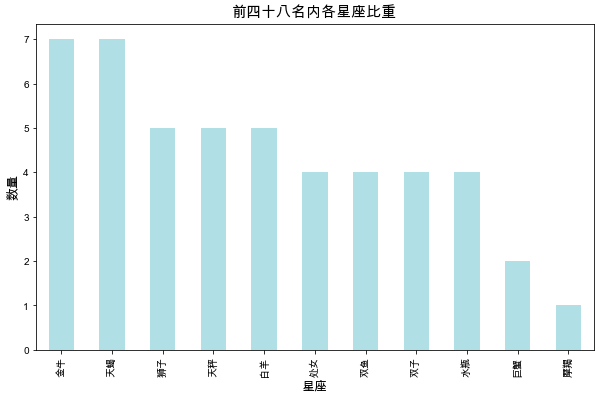

In [55]:
fig=plt.figure(figsize=(10,6)) 
g1_a.value_counts().plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前四十八名内各星座比重',size=15)

In [56]:
g1_b=g1_1['星座'].head(96)
print(len(g1_b))
g1_b.value_counts()

96


金牛    13
天秤    11
白羊    10
双鱼     9
双子     9
狮子     8
天蝎     8
水瓶     8
巨蟹     7
处女     6
摩羯     4
射手     3
Name: 星座, dtype: int64

Text(0.5,1,'前九十六名内各星座比重')

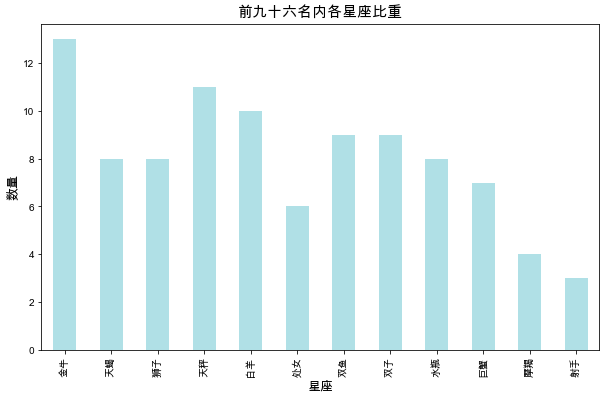

In [57]:
fig=plt.figure(figsize=(10,6)) 
g1_b.value_counts().plot(kind='bar',color='#ffffff')
g1_b.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前九十六名内各星座比重',size=15)

In [58]:
g1_c=g1_1['星座'].head(144) 
print(len(g1_c))
g1_c.value_counts()

144


双鱼    18
金牛    17
天秤    16
狮子    13
处女    12
天蝎    12
双子    12
白羊    11
巨蟹    11
水瓶    11
摩羯     7
射手     4
Name: 星座, dtype: int64

([<matplotlib.axis.YTick at 0x1216ea0b8>,
 <a list of 2 Text yticklabel objects>)

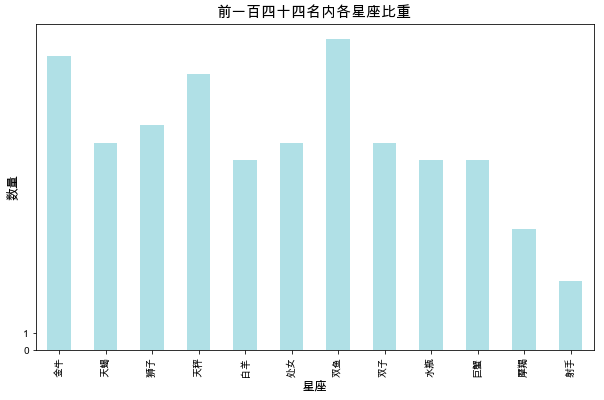

In [59]:
fig=plt.figure(figsize=(10,6)) 
g1_c.value_counts().plot(kind='bar',color='#ffffff')
g1_c.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前一百四十四名内各星座比重',size=15)
plt.yticks([0, 1])

In [60]:
g1_d=g1_1['星座'].head(192)
print(len(g1_d))
g1_d.value_counts()

192


天秤    25
金牛    19
双鱼    19
水瓶    18
狮子    17
处女    16
白羊    16
双子    16
巨蟹    15
天蝎    14
摩羯    10
射手     7
Name: 星座, dtype: int64

Text(0.5,1,'前一百九十二名内各星座比重')

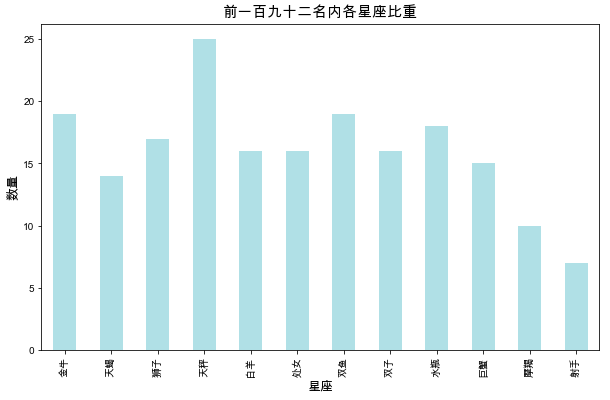

In [61]:
fig=plt.figure(figsize=(10,6)) 
g1_d.value_counts().plot(kind='bar',color='#ffffff')
g1_d.value_counts().loc[g1_xzorder].plot(kind='bar',color='#b0e0e6')
plt.xlabel('星座',size=13)
plt.ylabel('数量',size=13)
plt.title('前一百九十二名内各星座比重',size=15)

In [62]:
g1a=g1_a.value_counts()
a_ranking=dict(g1a)
print(a_ranking)
print(len(a_ranking))

{'金牛': 7, '天蝎': 7, '狮子': 5, '天秤': 5, '白羊': 5, '处女': 4, '双鱼': 4, '双子': 4, '水瓶': 4, '巨蟹': 2, '摩羯': 1}
11


In [63]:
a_ranking['射手'] = '0' #重新添加g1_a.value_counts()中被過濾掉的0次射手座
print(a_ranking)
print(len(a_ranking))

{'金牛': 7, '天蝎': 7, '狮子': 5, '天秤': 5, '白羊': 5, '处女': 4, '双鱼': 4, '双子': 4, '水瓶': 4, '巨蟹': 2, '摩羯': 1, '射手': '0'}
12


In [64]:
g1b=g1_b.value_counts()
b_ranking=dict(g1b)
print(b_ranking)
print(len(b_ranking))
g1c=g1_c.value_counts()
c_ranking=dict(g1c)
print(c_ranking)
print(len(c_ranking))
g1d=g1_d.value_counts()
d_ranking=dict(g1d)
print(d_ranking)
print(len(d_ranking))

{'金牛': 13, '天秤': 11, '白羊': 10, '双鱼': 9, '双子': 9, '狮子': 8, '天蝎': 8, '水瓶': 8, '巨蟹': 7, '处女': 6, '摩羯': 4, '射手': 3}
12
{'双鱼': 18, '金牛': 17, '天秤': 16, '狮子': 13, '处女': 12, '天蝎': 12, '双子': 12, '白羊': 11, '巨蟹': 11, '水瓶': 11, '摩羯': 7, '射手': 4}
12
{'天秤': 25, '金牛': 19, '双鱼': 19, '水瓶': 18, '狮子': 17, '处女': 16, '白羊': 16, '双子': 16, '巨蟹': 15, '天蝎': 14, '摩羯': 10, '射手': 7}
12


In [65]:
from pandas import DataFrame
from pandas.plotting import parallel_coordinates

In [66]:
df_g1=DataFrame({'星座':['天秤','水瓶','双鱼','金牛','处女','狮子','白羊','双子','巨蟹','天蝎','摩羯','射手'],'前四十八名':[2,3,3,1,3,2,2,3,4,1,5,6],'前九十六名':[2,5,4,1,7,5,3,4,6,5,8,9],'前一百四十四名':[3,6,1,2,5,4,6,5,6,5,7,8],'前一百九十二名':[1,2,2,2,4,3,4,4,5,6,7,8]})

(9, 1)

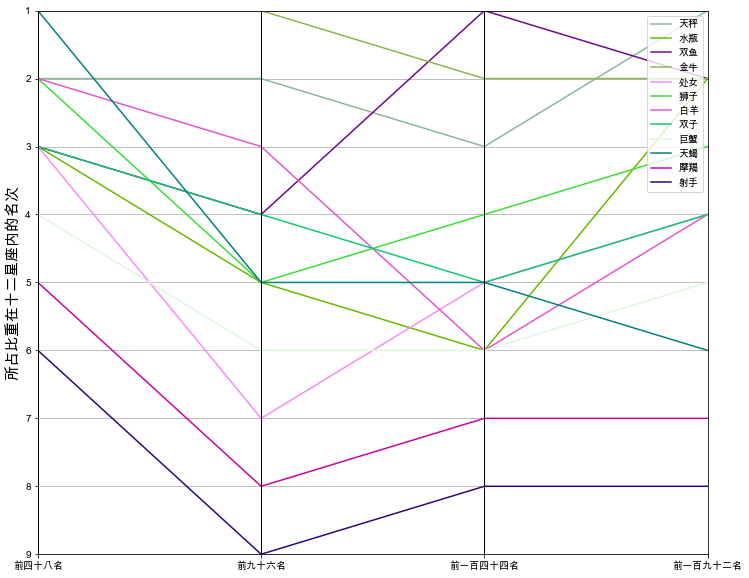

In [67]:
fig=plt.figure(figsize=(12,10)) 
plt.ylabel('所占比重在十二星座内的名次',size=15)
parallel_coordinates(df_g1,'星座')
plt.ylim((9, 1))

In [68]:
value = pd.read_csv('pd_namelists.csv',usecols=[4])
value.head(300)
forbes_value = pd.merge(wholedata, value, left_index=True, right_index=True, how='outer')
finaldata_clear = forbes_value.dropna(subset=['name', 'birthday', 'year', 'month','day','财富值（亿美元）'])
print(len(finaldata_clear))
finaldata_clear

193


,name,birthday,year,month,day,星座,财富值（亿美元）
0,Jeff Bezos,1964-01-12,1964,01,12,摩羯,1120
1,Bill Gates,1955-10-28,1955,10,28,天蝎,900
2,Warren Buffett,1930-08-30,1930,08,30,处女,840
3,Bernard Arnault,1949-03-05,1949,03,05,双鱼,720
4,Mark Zuckerberg,1984-05-14,1984,05,14,金牛,710
5,Amancio Ortega,1936-03-28,1936,03,28,白羊,700
6,Carlos Slim Helu,1940-01-28,1940,01,28,水瓶,671
7,Charles Koch,1935-11-01,1935,11,01,天蝎,600
8,David Koch,1940-05-03,1940,05,03,金牛,600
9,Larry Ellison,1944-08-17,1944,08,17,狮子,585


In [69]:
valueclear=finaldata_clear['财富值（亿美元）']
value1=DataFrame(valueclear)
value2=value1.reset_index(drop=True)
value_xz=pd.merge(xzlistdata, value2, left_index=True, right_index=True, how='outer')
value_xz

,星座,财富值（亿美元）
0,摩羯,1120
1,天蝎,900
2,处女,840
3,双鱼,720
4,金牛,710
5,白羊,700
6,水瓶,671
7,天蝎,600
8,金牛,600
9,狮子,585


In [70]:
grouped = value_xz['财富值（亿美元）'].groupby(value_xz['星座'])
sumvalue=DataFrame(grouped.sum())

In [71]:
sumvalue.to_csv('pd_sumvalue.csv')

In [72]:
sumvalue1 = pd.read_csv('pd_sumvalue.csv')
sumvalue2 = sumvalue1.sort_values(by="财富值（亿美元）", ascending=False)
sumvalue2

,星座,财富值（亿美元）
11,金牛,4145
4,天蝎,4007
3,天秤,3966
10,白羊,3607
1,双鱼,3512
9,狮子,3493
2,处女,3419
8,水瓶,3315
0,双子,2923
6,巨蟹,2363


In [104]:
import matplotlib.pyplot as plt
import squarify

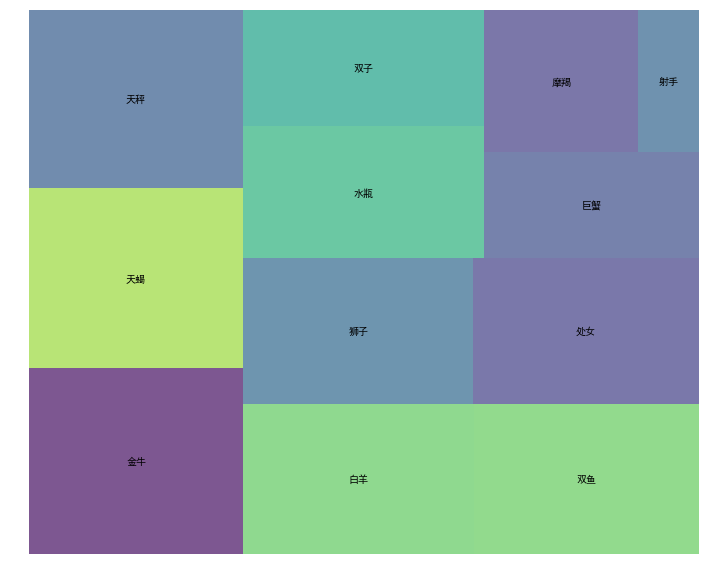

In [108]:
fig=plt.figure(figsize=(12,10))
squarify.plot(sizes=sumvalue2['财富值（亿美元）'], label=sumvalue2['星座'], alpha=.7 )
plt.axis('off')
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()